In [ ]:
#bibliotecas para pré-processamento
import pandas as pd
from datetime import datetime
import numpy as np
from google.colab import drive
import requests

#importar pacote do pandas para converter string para objeto
from pandas.api.types import CategoricalDtype

#bibliotecas para Matriz de Confusão
from sklearn.metrics import confusion_matrix

#biblioteca para Relatorio de Classificação
from sklearn.metrics import classification_report , accuracy_score , roc_auc_score

#biblioteca para iniciar o modelo de machine learning, Random Forest
from io import StringIO
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.multioutput import MultiOutputClassifier

#biblioteca para salvar o modelo treinado
import joblib

#biblioteca para manipulação do arquivo pkl
import pickle

In [ ]:
#ok
drive.mount('/content/drive')
dadosTempo_dir = '/content/drive/My Drive/Colab Notebooks/'
dadosTempo_dir

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


'/content/drive/My Drive/Colab Notebooks/'

In [ ]:
#ok
df_CGE = pd.read_csv('/content/drive/My Drive/Colab Notebooks/CGE2.csv', encoding='latin1' , sep=';')
df_CGE = df_CGE[['Região','Latitude','Longitude', 'Data','Chuva','Vento']]
df_CGE=df_CGE.dropna()
df_CGE

,Região,Latitude,Longitude,Data,Chuva,Vento
0,Alto de Pinheiros,-235.611,-467.011,01/10/2024,5.00,0.56
1,Anhanguera,-234.978,-467.523,01/10/2024,26.00,0.58
2,Aricanduva,-235.583,-465.011,01/10/2024,24.50,0.19
3,Artur Alvim,-235.394,-464.917,01/10/2024,23.20,0.00
4,Barra Funda,-235.275,-466.583,01/10/2024,22.10,0.65
...,...,...,...,...,...,...
10094,São Rafael,-235.667,-464.500,09/01/2025,76.05,14.68
10095,Sapopemba,-235.667,-465.000,09/01/2025,94.86,60.39
10096,Saúde,-236.000,-466.333,09/01/2025,288.02,97.54
10097,Sé,-235.505,-466.333,09/01/2025,122.18,52.72


In [ ]:
#ok
df_historico = pd.read_csv('/content/drive/My Drive/Colab Notebooks/historico.csv', encoding='latin1' , sep=';')
df_historico = df_historico[['Região', 'Data','Chuva','Vento','Queda Arvore', 'Alagamento']]
df_historico=df_historico.dropna()
df_historico['Data'] = pd.to_datetime(df_historico['Data'], format='%d/%m/%Y')
df_historico.dtypes

,0
Região,object
Data,datetime64[ns]
Chuva,float64
Vento,float64
Queda Arvore,int64
Alagamento,int64


In [ ]:
#ok
resultado_cnn_path = '/content/drive/My Drive/Colab Notebooks/ResultadoCNN.csv'
df_arvore = pd.read_csv('/content/drive/My Drive/Colab Notebooks/ResultadoCNN.csv', encoding='UTF-8' , sep=';')
#converter Data em Datetime
#df_arvore['Data'] = pd.to_datetime(df_arvore['Data'], format='%d/%m/%Y')
#remover a coluna Data
df_arvore = df_arvore.drop(columns=['Data'])
df_arvore

,Latitude,Longitude,Tipo,prob,Label
0,-23.5505,-46.6333,1,45,árvore normal
1,-23.5610,-46.6570,1,30,árvore normal
2,-23.5730,-46.6410,1,50,árvore propensa a queda
3,-23.5800,-46.6350,1,20,árvore normal
4,-23.5900,-46.6200,1,60,árvore propensa a queda
...,...,...,...,...,...
94,-23.8700,-46.3400,1,40,árvore normal
95,-23.8800,-46.3300,1,30,árvore normal
96,-23.8900,-46.3200,1,50,árvore propensa a queda
97,-23.9000,-46.3100,1,20,árvore normal


In [ ]:
#ok---devo excluir esse escopo
#df_arvore['Data'] = pd.to_datetime(df_arvore['Data'], format='mixed')
df_arvore.columns = df_arvore.columns.str.strip()  # Remove espaços ao redor dos nomes de colunas

df_arvore = df_arvore.drop(columns=['Data'])
df_arvore.head

KeyError: "['Data'] not found in axis"

In [ ]:
#ok
df_CGE['Chuva'] = df_CGE['Chuva'].astype(float)
df_CGE['Data'] = pd.to_datetime(df_CGE['Data'], format='%d/%m/%Y')
df_CGE.dtypes

,0
Região,object
Latitude,float64
Longitude,float64
Data,datetime64[ns]
Chuva,float64
Vento,float64


In [ ]:
#ok
df_bueiro = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Bueiro.csv',encoding='utf-8' , sep=';')
df_bueiro = df_bueiro[['Tipo','Latitude','Longitude', 'Data', 'Label']]
df_bueiro = df_bueiro.dropna()
#remover coluna Data do df_bueiro
df_bueiro = df_bueiro.drop(columns=['Data'])
#df_bueiro['Data'] = pd.to_datetime(df_bueiro['Data'], format='%d/%m/%Y')
df_bueiro.dtypes

,0
Tipo,int64
Latitude,float64
Longitude,float64
Label,object


In [ ]:
df_CGE.head()

,Região,Latitude,Longitude,Data,Chuva,Vento
0,Alto de Pinheiros,-235.611,-467.011,2024-10-01,5.0,0.56
1,Anhanguera,-234.978,-467.523,2024-10-01,26.0,0.58
2,Aricanduva,-235.583,-465.011,2024-10-01,24.5,0.19
3,Artur Alvim,-235.394,-464.917,2024-10-01,23.2,0.00
4,Barra Funda,-235.275,-466.583,2024-10-01,22.1,0.65


In [ ]:
# Pre-processamento (criar coluna 'indice' para identificador unico de cada região)
df_CGE['indice'] = pd.factorize(df_CGE['Região'])[0]
df_CGE.head()



,Região,Latitude,Longitude,Data,Chuva,Vento,indice
0,Alto de Pinheiros,-235.611,-467.011,2024-10-01,5.0,0.56,0
1,Anhanguera,-234.978,-467.523,2024-10-01,26.0,0.58,1
2,Aricanduva,-235.583,-465.011,2024-10-01,24.5,0.19,2
3,Artur Alvim,-235.394,-464.917,2024-10-01,23.2,0.00,3
4,Barra Funda,-235.275,-466.583,2024-10-01,22.1,0.65,4


In [ ]:
# Remover as colunas indesejadas que começam com 'Região_' ou 'indice_'
colunas_indesejadas = [col for col in df_CGE.columns if col.startswith('Região_') or col.startswith('indice_')]
df_CGE = df_CGE.drop(columns=colunas_indesejadas)
print(df_CGE.columns)
df_CGE.head()

Index(['Região', 'Latitude', 'Longitude', 'Data', 'Chuva', 'Vento', 'indice'], dtype='object')


,Região,Latitude,Longitude,Data,Chuva,Vento,indice
0,Alto de Pinheiros,-235.611,-467.011,2024-10-01,5.0,0.56,0
1,Anhanguera,-234.978,-467.523,2024-10-01,26.0,0.58,1
2,Aricanduva,-235.583,-465.011,2024-10-01,24.5,0.19,2
3,Artur Alvim,-235.394,-464.917,2024-10-01,23.2,0.00,3
4,Barra Funda,-235.275,-466.583,2024-10-01,22.1,0.65,4


In [ ]:
# Verificar se as colunas estão presentes
colunas_disponiveis = ['Data', 'Latitude', 'Longitude', 'Região', 'tipo', 'prob%']
colunas_existentes = [col for col in colunas_disponiveis if col in df_CGE.columns]

# Caso não todas as colunas estejam disponíveis, filtrar apenas as existentes
if len(colunas_existentes) < len(colunas_disponiveis):
    print(f"As seguintes colunas estão faltando: {set(colunas_disponiveis) - set(colunas_existentes)}")

# Preserve as colunas originais para o CSV final
dados_originais = df_CGE[colunas_existentes]


#unir CGE com arvore e CGE com bueiro
# Fazer o merge dos dois dataframes com base em 'Latitude' e 'Longitude'
df_comb_CGE_arvore = pd.merge(df_CGE, df_arvore, on=['Latitude', 'Longitude'], how='left')

#df_comb_CGE_bueiro = pd.merge(df_CGE, df_bueiro.drop(columns=['Latitude','Longitude']), on=['Data'])
# Fazer o merge dos dois dataframes com base em 'Latitude' e 'Longitude'
df_comb_CGE_bueiro = pd.merge(df_CGE, df_bueiro, on=['Latitude', 'Longitude'], how='left')
df_comb_CGE_bueiro

As seguintes colunas estão faltando: {'prob%', 'tipo'}


,Região,Latitude,Longitude,Data,Chuva,Vento,indice,Tipo,Label
0,Alto de Pinheiros,-235.611,-467.011,2024-10-01,5.00,0.56,0,NaN,NaN
1,Anhanguera,-234.978,-467.523,2024-10-01,26.00,0.58,1,NaN,NaN
2,Aricanduva,-235.583,-465.011,2024-10-01,24.50,0.19,2,NaN,NaN
3,Artur Alvim,-235.394,-464.917,2024-10-01,23.20,0.00,3,NaN,NaN
4,Barra Funda,-235.275,-466.583,2024-10-01,22.10,0.65,4,NaN,NaN
...,...,...,...,...,...,...,...,...,...
10094,São Rafael,-235.667,-464.500,2025-01-09,76.05,14.68,79,NaN,NaN
10095,Sapopemba,-235.667,-465.000,2025-01-09,94.86,60.39,80,NaN,NaN
10096,Saúde,-236.000,-466.333,2025-01-09,288.02,97.54,81,NaN,NaN
10097,Sé,-235.505,-466.333,2025-01-09,122.18,52.72,82,NaN,NaN


In [ ]:
# Reconstruindo a coluna 'Região' a partir das colunas dummies para CGE com arvore
regiao_cols_arv = [col for col in df_comb_CGE_arvore.columns if col.startswith('Região_')]

# Reconstruindo a coluna 'Região' a partir das colunas dummies para CGE com bueiro
regiao_cols_bue = [col for col in df_comb_CGE_bueiro.columns if col.startswith('Região_')]

In [ ]:
# Excluir as colunas de Região antes de separar os dados (usando a nova coluna 'indice' como feature)
df_comb_CGE_arvore['indice'] = pd.factorize(df_comb_CGE_arvore['Região'])[0]

df_comb_CGE_bueiro['indice'] = pd.factorize(df_comb_CGE_bueiro['Região'])[0]

df_historico['indice'] = pd.factorize(df_historico['Região'])[0]
#df_encoded = df_encoded.drop(columns=regiao_cols + ['Data', 'Latitude', 'Longitude', 'Label'])


In [ ]:
# Criar as labels para Queda de Árvore e Alagamento
df_comb_CGE_arvore['Label_Queda'] = (df_comb_CGE_arvore['Tipo'] == 1).astype(int)  # 1 para Queda de Árvore
df_comb_CGE_bueiro['Label_Alagamento'] = (df_comb_CGE_bueiro['Tipo'] == 2).astype(int)  # 1 para Alagamento


In [ ]:
# Verificar o resultado
print(df_comb_CGE_arvore[['Tipo', 'Label_Queda']].head())
print(df_comb_CGE_bueiro[['Tipo', 'Label_Alagamento']].head())

   Tipo  Label_Queda
0   NaN            0
1   NaN            0
2   NaN            0
3   NaN            0
4   NaN            0
   Tipo  Label_Alagamento
0   NaN                 0
1   NaN                 0
2   NaN                 0
3   NaN                 0
4   NaN                 0


In [ ]:
##a partir daki do chatgpt

In [ ]:
# 1. Modelo para prever Alagamento
X_alagamento = df_historico[['Vento', 'Chuva', 'indice']]  # Variáveis preditoras
y_alagamento = df_historico['Alagamento']  # Variável de resposta
X_alagamento.head()

,Vento,Chuva,indice
0,27.7,11.0,0
1,26.6,14.3,1
2,10.6,12.1,2
3,21.4,10.9,3
4,22.2,8.5,4


In [ ]:
# Dividir em dados de treino e teste
X_train_alag, X_test_alag, y_train_alag, y_test_alag = train_test_split(X_alagamento, y_alagamento, test_size=0.2, random_state=42)


In [ ]:
# Treinar o modelo de alagamento
modelo_alag = RandomForestClassifier(n_estimators=100, random_state=42)
modelo_alag.fit(X_train_alag, y_train_alag)

RandomForestClassifier(random_state=42)

In [ ]:
# Fazer predições
alagamento_preds = modelo_alag.predict(df_CGE[['Vento', 'Chuva', 'indice']])



In [ ]:
# 1. Relatório de Classificação - Alagamento

# Fazer predições no conjunto de teste
y_pred_alag = modelo_alag.predict(X_test_alag)

# Geração do relatório de classificação
relatorio_alag = classification_report(y_test_alag, y_pred_alag, target_names=['Sem Alagamento', 'Alagamento'])

# Exibe o relatório de classificação para o modelo de alagamento
print("Relatório de Classificação - Alagamento:")
print(relatorio_alag)

Relatório de Classificação - Alagamento:
                precision    recall  f1-score   support

Sem Alagamento       0.69      0.85      0.76       330
    Alagamento       0.33      0.17      0.22       150

      accuracy                           0.64       480
     macro avg       0.51      0.51      0.49       480
  weighted avg       0.58      0.64      0.59       480



In [ ]:
# 2. Modelo para prever Queda de Árvore
X_queda = df_historico[['Vento', 'Chuva', 'indice']]
y_queda = df_historico['Queda Arvore']

In [ ]:

# Dividir em dados de treino e teste
X_train_queda, X_test_queda, y_train_queda, y_test_queda = train_test_split(X_queda, y_queda, test_size=0.2, random_state=42)


In [ ]:
# Treinar o modelo de queda de árvore
modelo_queda = RandomForestClassifier(n_estimators=100, random_state=42)
modelo_queda.fit(X_train_queda, y_train_queda)

RandomForestClassifier(random_state=42)

In [ ]:
# Fazer predições
queda_preds = modelo_queda.predict(df_CGE[['Vento', 'Chuva', 'indice']])

In [ ]:
# 2. Relatório de Classificação - Queda de Árvore

# Fazer predições no conjunto de teste
y_pred_queda = modelo_queda.predict(X_test_queda)

# Geração do relatório de classificação
relatorio_queda = classification_report(y_test_queda, y_pred_queda, target_names=['Sem Queda de Árvore', 'Queda de Árvore'])

# Exibe o relatório de classificação para o modelo de queda de árvore
print("\nRelatório de Classificação - Queda de Árvore:")
print(relatorio_queda)


Relatório de Classificação - Queda de Árvore:
                     precision    recall  f1-score   support

Sem Queda de Árvore       0.59      0.69      0.64       269
    Queda de Árvore       0.50      0.40      0.44       211

           accuracy                           0.56       480
          macro avg       0.55      0.54      0.54       480
       weighted avg       0.55      0.56      0.55       480



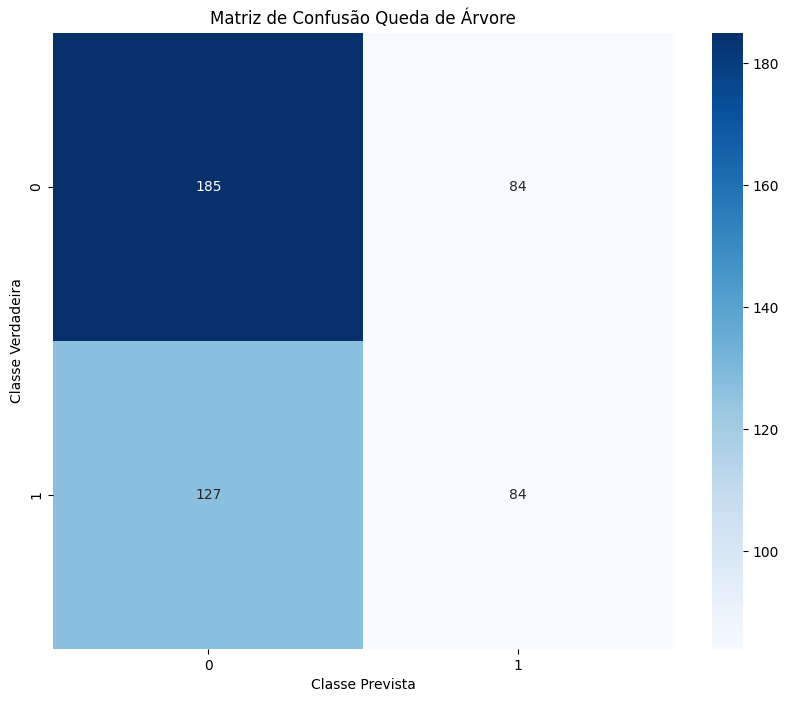

In [ ]:
conf_mat = confusion_matrix(y_test_queda, y_pred_queda)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Classe Prevista')
plt.ylabel('Classe Verdadeira')
plt.title('Matriz de Confusão Queda de Árvore')
plt.show()

In [ ]:
conf_mat = confusion_matrix(y_test_alag, y_pred_alag)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Classe Prevista')
plt.ylabel('Classe Verdadeira')
plt.title('Matriz de Confusão Alagamento')
plt.show()

In [ ]:
# Combinar as predições e dados
df_CGE['Pred_Alagamento'] = alagamento_preds
df_CGE['Pred_Queda_Arvore'] = queda_preds
df_CGE

In [ ]:
#na tabela df_CGE criar coluna prob%
df_CGE['prob_alag%'] = 0.0
#se Pred_Alagamento = 1 entao prob%= (Chuva/100)*0.5
df_CGE.loc[df_CGE['Pred_Alagamento'] == 0, 'prob_alag%'] = df_CGE['Chuva'] / 100 * 0.5

#se Pred_Queda_Arvore = 1 entao , if 15.28 <= Vento <=18.6 , entao prob% = 0.75
df_CGE['prob_queda%'] = 0.0
# Se a coluna 'Pred_Queda_Arvore' for 1 e o valor de 'Vento' estiver entre 15.28 e 18.6, definir 'prob%' como 0.75
df_CGE.loc[(df_CGE['Pred_Queda_Arvore'] == 0) & (df_CGE['Vento'].between(15.28, 18.6)), 'prob_queda%'] = 0.75
df_CGE.loc[(df_CGE['Pred_Queda_Arvore'] == 0) & (df_CGE['Vento'].between(21.67, 300)), 'prob_queda%'] = 1.00

df_CGE


In [ ]:
# Salvar o resultado final
resultado_alagamento = df_CGE[['Região', 'Latitude', 'Longitude', 'Data', 'Vento', 'Chuva', 'indice', 'Pred_Alagamento', 'prob_alag%']]
resultado_queda = df_CGE[['Região', 'Latitude', 'Longitude', 'Data', 'Vento', 'Chuva', 'indice', 'Pred_Queda_Arvore', 'prob_queda%']]
resultado_alagamento

In [ ]:
#fazer merge com resultado_queda e resultado_alagamento
resultado_final = pd.merge(resultado_queda, resultado_alagamento, on=['Região', 'Latitude', 'Longitude', 'Data', 'Vento', 'Chuva', 'indice','Pred_Alagamento', 'prob_alag%','Pred_Queda_Arvore', 'prob_queda%'], how='outer')
# Salvar em arquivo CSV
resultado_final.to_csv('/content/drive/My Drive/Colab Notebooks/resultado_final.csv', index=False)